In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics


## Loading data

In [2]:
df = pd.read_csv('titanic3.csv', delimiter=',')
df 

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


## EDA

In [3]:
print(df.columns)
df.isnull().sum()

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')


pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

After closer inspection I can see that the last row does not contain any data so we will remove it.

In [4]:
df = df.drop(df.index[-1])
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [ ]:
ages = df['age']


## Cleaning up data

Imputing the null values for age and fare

In [5]:
mean_age = df['age'].mean()
mean_fare = df['fare'].mean()
df['age'] = df['age'].fillna(mean_age)
df['fare'] = df['fare'].fillna(mean_age)
df['age'].isnull().sum()
df['fare'].isnull().sum()
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.000000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.916700,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.000000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.500000,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,29.881135,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.500000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.000000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN


What other columns may need attention?

In [6]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

All null values for numerical columns that have meaning seem to have been resolved.

In [7]:
dtypes = df.dtypes
print(dtypes)

pclass       float64
survived     float64
name          object
sex           object
age          float64
sibsp        float64
parch        float64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object


## Encoding categorical data

We will encode the categorical data so we can use all numerical data for the training of our model

In [8]:
columns_to_encode = ['sex','embarked']
encoded_df = pd.get_dummies(df, columns=columns_to_encode)

Result

In [9]:
encoded_df.head()

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,boat,body,home.dest,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",29.0000,0.0,0.0,24160,211.3375,B5,2,NaN,"St Louis, MO",1,0,0,0,1
1,1.0,1.0,"Allison, Master. Hudson Trevor",0.9167,1.0,2.0,113781,151.5500,C22 C26,11,NaN,"Montreal, PQ / Chesterville, ON",0,1,0,0,1
2,1.0,0.0,"Allison, Miss. Helen Loraine",2.0000,1.0,2.0,113781,151.5500,C22 C26,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,0,0,0,1
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",30.0000,1.0,2.0,113781,151.5500,C22 C26,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,1,0,0,1
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1.0,2.0,113781,151.5500,C22 C26,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,0,0,0,1


## Selecting features based on correlation with survival rate

We will plot features against survival rate and see which features make sense to train a model on.

In [10]:
encoded_df.columns
valuable_cols = ['pclass','survived','age','sibsp','parch','fare','sex_female','sex_male']
df_valuable = encoded_df[valuable_cols]
df_valuable

,pclass,survived,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1.0,1.0,29.000000,0.0,0.0,211.3375,1,0,0,0,1
1,1.0,1.0,0.916700,1.0,2.0,151.5500,0,1,0,0,1
2,1.0,0.0,2.000000,1.0,2.0,151.5500,1,0,0,0,1
3,1.0,0.0,30.000000,1.0,2.0,151.5500,0,1,0,0,1
4,1.0,0.0,25.000000,1.0,2.0,151.5500,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,14.500000,1.0,0.0,14.4542,1,0,1,0,0
1305,3.0,0.0,29.881135,1.0,0.0,14.4542,1,0,1,0,0
1306,3.0,0.0,26.500000,0.0,0.0,7.2250,0,1,1,0,0
1307,3.0,0.0,27.000000,0.0,0.0,7.2250,0,1,1,0,0


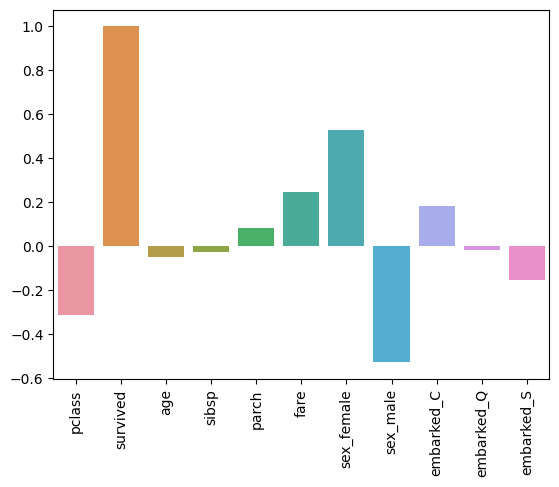

pclass       -0.312469
survived      1.000000
age          -0.050199
sibsp        -0.027825
parch         0.082660
fare          0.244247
sex_female    0.528693
sex_male     -0.528693
embarked_C    0.182123
embarked_Q   -0.016071
embarked_S   -0.154558
dtype: float64


In [11]:
corr_matrix = df_valuable.corrwith(df['survived'])
sns.barplot(x=corr_matrix.index, y=corr_matrix.values)
plt.xticks(rotation=90)
plt.show()
print(corr_matrix)

These correlation values allow us to choose the most valuable features for predicting the survived column.
I will go with:
 - pclass
 - age
 - sibsp
 - parch
 - fare
 - sex_female
 - sex_male
 - embarked_C
 - embarked_Q
 - embarked_S

## Training model

In [12]:
feature_cols = ['pclass','age','sibsp','parch','fare','sex_female','sex_male','embarked_C','embarked_Q','embarked_S']

X = df_valuable[feature_cols]
y = df_valuable['survived']

In [13]:
print(X.dtypes)

pclass        float64
age           float64
sibsp         float64
parch         float64
fare          float64
sex_female      uint8
sex_male        uint8
embarked_C      uint8
embarked_Q      uint8
embarked_S      uint8
dtype: object


In [14]:
print(y)

0       1.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
1304    0.0
1305    0.0
1306    0.0
1307    0.0
1308    0.0
Name: survived, Length: 1309, dtype: float64


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train)
print(X_test)

      pclass        age  sibsp  parch      fare  sex_female  sex_male  \
1118     3.0  25.000000    0.0    0.0    7.9250           0         1   
44       1.0  41.000000    0.0    0.0  134.5000           1         0   
1072     3.0  29.881135    0.0    0.0    7.7333           0         1   
1130     3.0  18.000000    0.0    0.0    7.7750           1         0   
574      2.0  29.000000    1.0    0.0   21.0000           0         1   
...      ...        ...    ...    ...       ...         ...       ...   
763      3.0   0.166700    1.0    2.0   20.5750           1         0   
835      3.0  29.881135    0.0    0.0    8.0500           0         1   
1216     3.0  29.881135    0.0    0.0    7.7333           1         0   
559      2.0  20.000000    0.0    0.0   36.7500           1         0   
684      3.0  32.000000    1.0    1.0   15.5000           1         0   

      embarked_C  embarked_Q  embarked_S  
1118           0           0           1  
44             1           0         

### Training the model

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

print('Intercept', model.intercept_)
print("Coefficient", model.coef_)

Intercept 1.1212438942508454
Coefficient [-1.47641937e-01 -4.77038748e-03 -4.26592940e-02 -6.12625971e-03
  2.25566229e-04  2.46872119e-01 -2.46872119e-01 -9.49941199e-02
 -1.74284501e-01 -1.96174341e-01]


In [17]:
coefficients = model.coef_.reshape(10,-1)
variables = np.array([['pclass','age','sibsp','parch','fare','sex_female','sex_male','embarked_C','embarked_Q','embarked_S']]).reshape(10,-1)

coeff = pd.DataFrame(coefficients, variables)

print(coeff)

                      0
(pclass,)     -0.147642
(age,)        -0.004770
(sibsp,)      -0.042659
(parch,)      -0.006126
(fare,)        0.000226
(sex_female,)  0.246872
(sex_male,)   -0.246872
(embarked_C,) -0.094994
(embarked_Q,) -0.174285
(embarked_S,) -0.196174


## Predictions

Now that we have trained our model it's time to make some predictions

In [18]:
y_pred = model.predict(X_test)

Print the actual and predicted values for the first 25 records from the test set

In [19]:
compare_df = pd.DataFrame({'Actual': y_test[:25], 'Predicted': y_pred[:25]})
print(compare_df)

      Actual  Predicted
1139     0.0   0.055778
533      1.0   0.775090
459      0.0   0.145988
1150     0.0   0.095998
393      0.0   0.270759
1189     1.0   0.664916
5        1.0   0.307566
231      1.0   0.289375
330      0.0   0.113934
887      1.0   0.094557
531      0.0   0.344944
790      0.0   0.139785
427      1.0   0.334218
1260     1.0   0.645369
251      1.0   0.986914
486      0.0   0.270793
436      1.0   0.619126
31       1.0   0.447913
186      1.0   0.869362
1051     0.0   0.079665
769      0.0   0.131958
642      0.0  -0.002553
1087     0.0   0.103472
55       1.0   0.929670
678      0.0   0.262483


Visualization of first 10 results

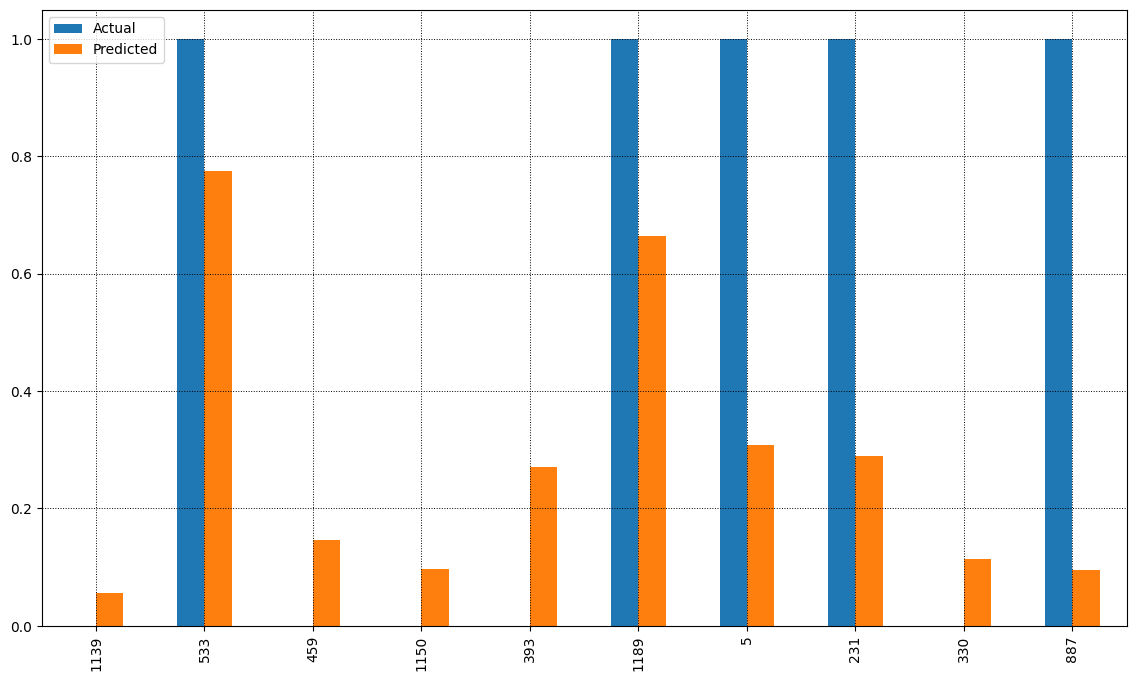

In [20]:
compare25_df = compare_df.head(10)
compare25_df.plot(kind='bar', figsize=(14,8))
plt.grid(linestyle=':', linewidth='0.7', color='black')
plt.show()

In [21]:
print("Mean absolute error =", round(metrics.mean_absolute_error(y_test, y_pred), 2))
print("Mean squared error =", round(metrics.mean_squared_error(y_test, y_pred), 2))
print("Root Mean Squared Error =", round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 2))
print("R2 score =", round(metrics.r2_score(y_test, y_pred), 2))

Mean absolute error = 0.31
Mean squared error = 0.15
Root Mean Squared Error = 0.39
R2 score = 0.37


# Decision Tree

Training our model using a decision tree algorithm

In [22]:
feature_cols = ['pclass','age','sibsp','parch','fare','sex_female','sex_male','embarked_C','embarked_Q','embarked_S']

X = df_valuable[feature_cols]
y = df_valuable['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Training the classifier

In [23]:
clf = DecisionTreeClassifier(criterion = "entropy", max_depth=6)
clf = clf.fit(X, y)

Visualizing the decision tree

In [24]:
predictions = clf.predict(X_test)
predictions

array([0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 1.

In [25]:
predictions = clf.predict(X_test)
y_pred = np.round(predictions).astype(int)

# Convert y_test to integers
int_y_test = y_test.astype(int).values



## Performance metrics

In [26]:
compare_df = pd.DataFrame({'Actual': y_test[:25], 'Predicted': y_pred[:25]})
print(compare_df)

      Actual  Predicted
201      0.0          0
115      0.0          0
255      1.0          1
1103     0.0          0
195      1.0          1
1281     0.0          0
1138     0.0          0
288      1.0          1
270      1.0          1
248      0.0          0
1015     0.0          0
602      0.0          0
789      0.0          0
546      1.0          1
927      0.0          0
88       1.0          1
807      0.0          0
1247     1.0          1
962      0.0          0
761      0.0          0
639      0.0          0
891      0.0          0
65       1.0          1
1074     0.0          0
1009     0.0          0


Accuracy

In [27]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8702290076335878


Confusion matrix

In [28]:
metrics.confusion_matrix(y_test, y_pred, labels=[0,1])

array([[147,   9],
       [ 25,  81]], dtype=int64)

Precision score

In [29]:
metrics.precision_score(y_test, y_pred)

0.9

Report

In [30]:
print(metrics.classification_report(y_test, y_pred, target_names=['died', 'survived']))

              precision    recall  f1-score   support

        died       0.85      0.94      0.90       156
    survived       0.90      0.76      0.83       106

    accuracy                           0.87       262
   macro avg       0.88      0.85      0.86       262
weighted avg       0.87      0.87      0.87       262



## plotting the results

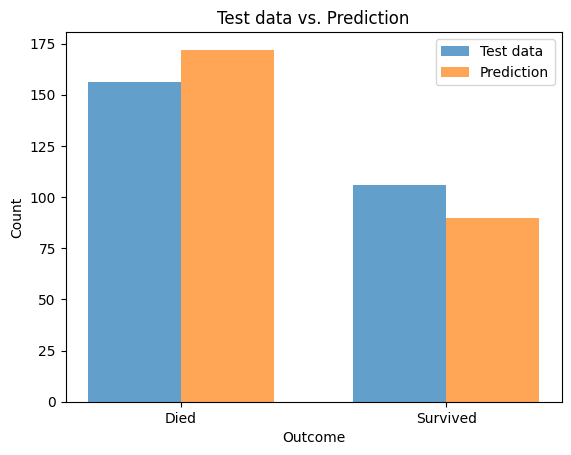

In [32]:
true_counts = np.bincount(y_test)
predicted_counts = np.bincount(y_pred)

labels = ['Died', 'Survived']

x = np.arange(len(labels))

width = 0.35

plt.bar(x - width/2, true_counts, width, label='Test data', align='center', alpha=0.7)

plt.bar(x + width/2, predicted_counts, width, label='Prediction', align='center', alpha=0.7)

plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Test data vs. Prediction')
plt.xticks(x, labels)
plt.legend()

# Show the plot
plt.show()